In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

scikit-learn - библиотека для машинного обучения

In [65]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM', 'Dona': 'RoyaltyF'}

In [66]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [67]:
def populate_embarked(df):
    embarked = df.groupby('Embarked').count()['PassengerId']
    embarked_max = embarked[embarked == embarked.max()].index[0]
    df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max
    return df

In [68]:
def set_titles(df, mapping):
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
    df.replace({'Title': mapping}, inplace=True)
    df['Title'].unique()
    return df

In [69]:
def populate_age(df):
    age_med = df.groupby('Title')['Age'].median()
    for title, age in age_med.iteritems():
        filter_age = df['Age'].isnull()
        filter_title = df['Title'] == title
        df.loc[filter_age & filter_title, 'Age'] = age
    return df

In [70]:
test = populate_embarked(test)
test = set_titles(test, mapping)
test = populate_age(test)

In [71]:
train = populate_embarked(train)
train = set_titles(train, mapping)
train = populate_age(train)

axis=1 это удаление колонок, axis=0 это удаление строк

In [72]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [73]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [74]:
result = pd.DataFrame(test['PassengerId'])
test = test.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [75]:
result.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [76]:
le = LabelEncoder()
classes = {}

In [77]:
le.fit(train['Sex'])
le.classes_

array(['female', 'male'], dtype=object)

In [78]:
classes['Sex'] = le.classes_
train['Sex'] = le.transform(train['Sex'])

тот пол, который попался первым, будет кодироваться 0, следующий - 1 и т.д.

In [79]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


In [80]:
le.fit(train['Embarked'])
classes['Embarked'] = le.classes_
train['Embarked'] = le.transform(train['Embarked'])

In [81]:
le.fit(train['Title'])
classes['Title'] = le.classes_
train['Title'] = le.transform(train['Title'])

In [82]:
classes

{'Sex': array(['female', 'male'], dtype=object),
 'Embarked': array(['C', 'Q', 'S'], dtype=object),
 'Title': array(['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Rev', 'RoyaltyF',
        'RoyaltyM'], dtype=object)}

In [83]:
le.fit(classes['Sex'])
test['Sex'] = le.transform(test['Sex'])

le.fit(classes['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

le.fit(classes['Title'])
test['Title'] = le.transform(test['Title'])

In [126]:
test['Fare'][test['Fare'].isnull()] = test['Fare'].median()

c:\projects\data_science\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


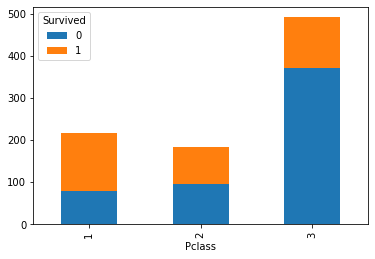

In [52]:
survived_pclass = df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')
survived_pclass.plot(kind='bar', stacked=True)

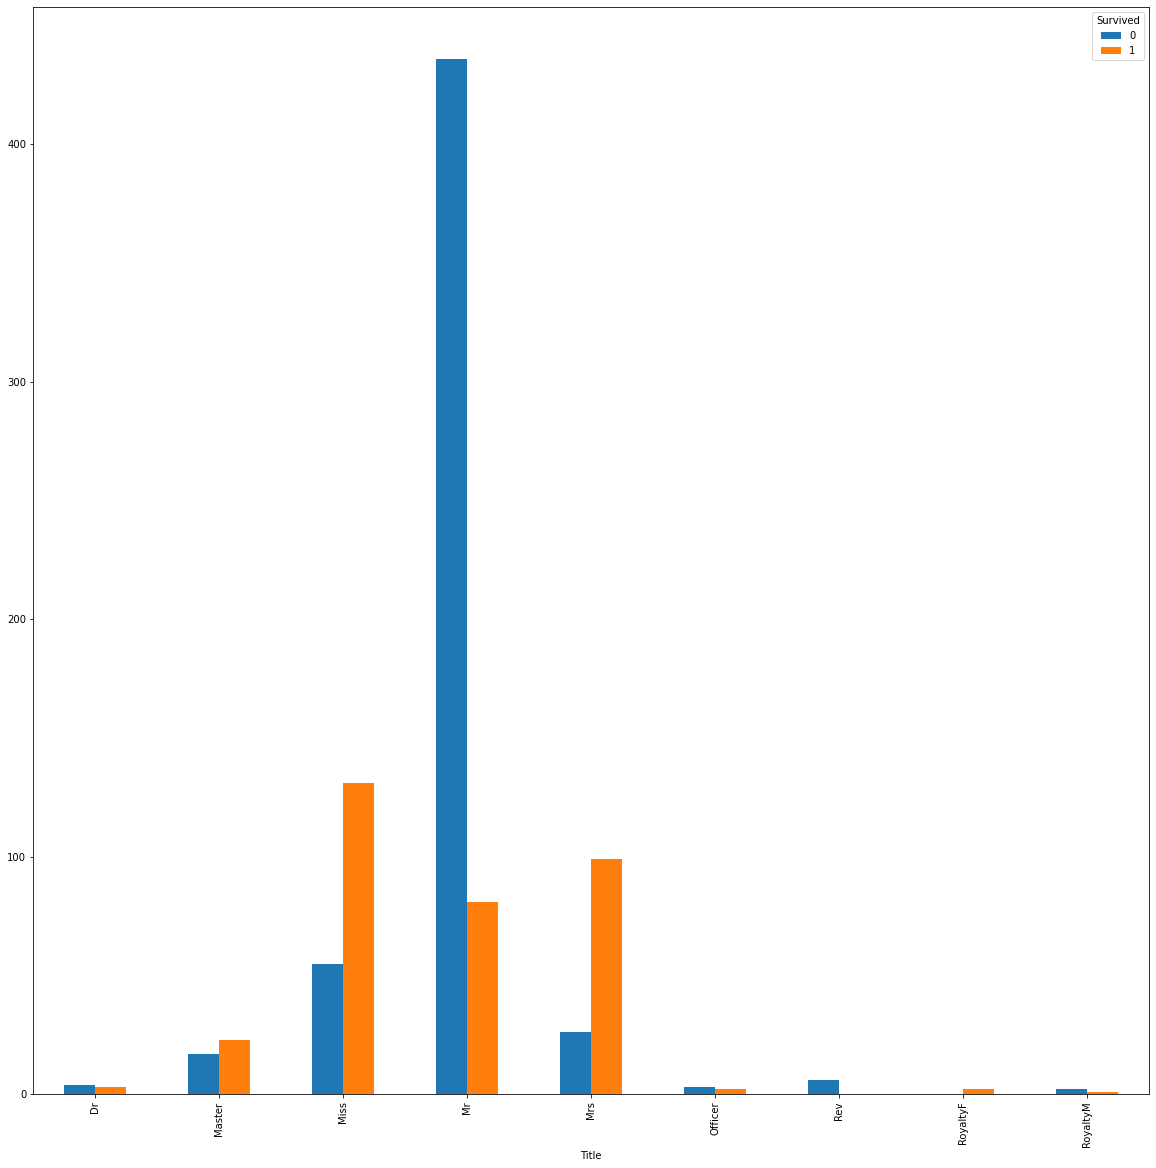

In [55]:
survived_title = df.pivot_table(values='PassengerId', index='Title', columns='Survived', aggfunc='count')
survived_title.plot(kind='bar', figsize=(20,20))

In [1]:
!dir titanic

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 98B0-316B

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\projects\data_science\titanic

09.06.2020  22:35    <DIR>          .
09.06.2020  22:35    <DIR>          ..
11.12.2019  02:17             3я258 gender_submission.csv
11.12.2019  02:17            28я629 test.csv
11.12.2019  02:17            61я194 train.csv
               3 д ©«®ў         93я081 Ў ©в
               2 Ї Ї®Є  22я156я546я048 Ў ©в бў®Ў®¤­®
